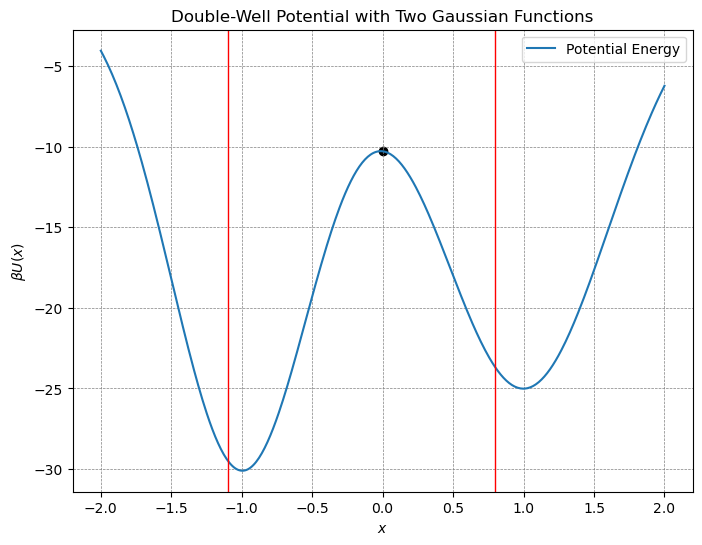

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve
from scipy.integrate import quad
from scipy.interpolate import interp1d, PchipInterpolator, CubicSpline

# Define the double-well potential using two Gaussian functions
def double_gaussian_potential(x, A1=30, mu1=-1, sigma1=0.5, A2=25, mu2=1, sigma2=0.6):
    V1 = A1 * np.exp(-((x - mu1)**2) / (2 * sigma1**2))
    V2 = A2 * np.exp(-((x - mu2)**2) / (2 * sigma2**2))
    return -(V1 + V2)
beta_U = double_gaussian_potential

D0 = 0.01
def D(x):
    # return D0*x**(2/3)
    return D0*x**0
x = np.linspace(-2, 2, 400)

# Plot the potential
plt.figure(figsize=(8, 6))
plt.plot(x, beta_U(x), label='Potential Energy')
plt.title('Double-Well Potential with Two Gaussian Functions')
plt.xlabel('$x$')
plt.ylabel(r'$\beta U(x)$')
# plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0.8, color='red',linewidth=1)
plt.axvline(-1.1, color='red',linewidth=1)
plt.scatter(0, beta_U(0), color='black')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

In [2]:
a = 0.1   # location of Injecting point
b1 = -1.1  # location of lower absorbing boundary
b2 = 1.1   # location of upper absorbing boundary
h = 0.01
N = int((b2-b1)/h+1)
x_arr = np.linspace(b1, b2, N)
re_inject_idx = np.where(np.round(x_arr, decimals=10) == a)[0][0]

N1 = int((a-b1)/h+1)
N2 = int((b2-a)/h+1)
x1_arr = np.linspace(b1, a, N1)
x2_arr = np.linspace(a, b2, N2)

In [3]:
from transfer_matrix_recycle import TransferMatrix_AbInAb
from transfer_matrix_reptile import TransferMatrix_InReAb, TransferMatrix_AbReIn

aia_trans = TransferMatrix_AbInAb(h, x_arr, beta_U, recycle_idx=re_inject_idx, criteria=0)

ari1_trans = TransferMatrix_AbReIn(h, x1_arr, beta_U, 0)
ira2_trans = TransferMatrix_InReAb(h, x2_arr, beta_U, 0)

from mfpt_Pst_RW_2subset_simu2 import simulate_AbInAb_regular

num_particles = 2000
init_position = a
hx = h
ht = hx**2/(2*D0)
n_arr = np.arange(b1, b2+h/2, h)
n_arr = np.round(n_arr, decimals=8)

In [4]:
%%time

count_left, count_right, ti_left, ti_right = simulate_AbInAb_regular(init_point=init_position, num_particles=num_particles, beta_U=beta_U, n_arr=n_arr, b1=b1, b2=b2, hx=hx)

1 left
2 right
3 left
4 left
5 left
6 left
7 left
8 left
9 left
10 left
11 left
12 left
13 left
14 right
15 left
16 right
17 left
18 left
19 left
20 left
21 left
22 left
23 left
24 left
25 left
26 right
27 left
28 left
29 left
30 left
31 left
32 left
33 left
34 left
35 left
36 left
37 left
38 left
39 left
40 left
41 left
42 left
43 left
44 left
45 left
46 left
47 right
48 right
49 left
50 left
51 left
52 left
53 left
54 left
55 left
56 left
57 left
58 left
59 left
60 left
61 left
62 right
63 right
64 right
65 left
66 left
67 left
68 right
69 left
70 left
71 right
72 left
73 left
74 left
75 left
76 left
77 left
78 left
79 left
80 right
81 left
82 left
83 left
84 left
85 left
86 left
87 left
88 left
89 right
90 left
91 left
92 left
93 left
94 left
95 left
96 left
97 left
98 left
99 left
100 left
101 left
102 left
103 left
104 left
105 left
106 right
107 left
108 left
109 left
110 right
111 right
112 left
113 left
114 left
115 right
116 left
117 left
118 left
119 left
120 left
121 left
12

In [5]:
# np.save('data/count_n_high', count_n)
# np.save('data/ti_n_high', ti_n)

2000.0 2000.0


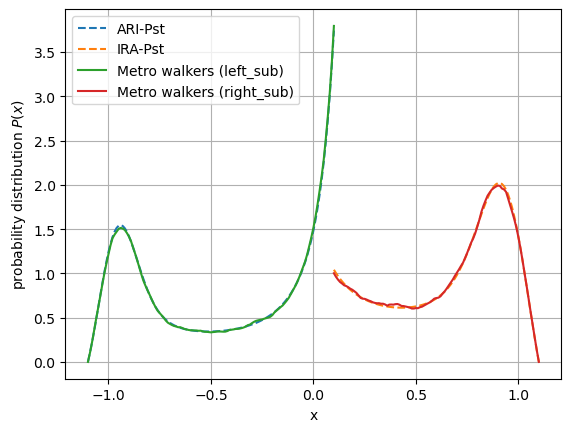

In [6]:
ari1_trans.steady_state[0] = 0
ira2_trans.steady_state[-1] = 0
ari1_trans.steady_state = ari1_trans.steady_state/(h*np.sum(ari1_trans.steady_state))
ira2_trans.steady_state = ira2_trans.steady_state/(h*np.sum(ira2_trans.steady_state))
plt.plot(x1_arr, ari1_trans.steady_state, '--', label="ARI-Pst")
plt.plot(x2_arr, ira2_trans.steady_state, '--', label="IRA-Pst")

n1_arr = n_arr[:N1]
n2_arr = n_arr[N1-1:]
count_n1 = np.sum(count_left, axis=0)
count_n2 = np.sum(count_right, axis=0)
print(count_n1[0], count_n2[-1])

count_n1[0] = 0
count_n2[-1] = 0
Pst_n1 = count_n1/(h*np.sum(count_n1))
Pst_n2 = count_n2/(h*np.sum(count_n2))
plt.plot(n1_arr, Pst_n1, label="Metro walkers (left_sub)")
plt.plot(n2_arr, Pst_n2, label="Metro walkers (right_sub)")

plt.xlabel('x')
plt.ylabel("probability distribution $P(x)$")
plt.legend()
plt.grid()
# plt.savefig("graphs/high_barrier_Pst.pdf", format='pdf')
# 3671.0 1041.0

In [7]:
Pst_n1-ari1_trans.steady_state

array([ 0.00000000e+00, -8.99581497e-04,  1.17588283e-03,  7.22922738e-03,
        9.81586112e-03, -1.08342884e-04, -7.02381129e-03, -1.05596626e-02,
       -1.29114351e-02, -2.03364937e-02, -2.41087475e-02, -1.60937292e-02,
       -1.23240287e-02, -3.26664722e-02, -4.26937161e-02, -3.48794867e-02,
       -3.12963582e-02, -2.85504139e-02, -1.88931424e-02, -1.34623341e-02,
       -3.22191611e-03,  4.59424355e-03, -8.30014397e-04, -1.60268863e-04,
       -2.15477128e-03, -7.70379672e-03, -1.50743159e-02, -1.99359804e-02,
       -1.11017714e-02, -3.18473739e-03,  4.41556555e-03,  3.91493887e-03,
        2.57304525e-04, -3.31579189e-03, -6.05228675e-03, -5.28465752e-04,
        1.93381691e-03, -4.69237054e-05, -9.91080725e-03, -1.45451089e-02,
       -1.17637993e-02, -1.01729594e-02, -7.99784845e-03, -2.74722734e-03,
       -1.97583734e-03,  6.55089172e-03,  5.16061405e-03,  5.61898802e-04,
        7.29256345e-04, -5.60573487e-04, -4.20918206e-04,  2.14978945e-03,
        3.48562621e-03,  

/tmp/ipykernel_814323/3554627992.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(x1_arr, -np.log(Pst_n1), label='Metro walkers (left_sub)')
/tmp/ipykernel_814323/3554627992.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(x2_arr, -np.log(Pst_n2), label='Metro walkers (right_sub)')
/tmp/ipykernel_814323/3554627992.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(x1_arr, -np.log(ari1_trans.steady_state),'--', label="ARI-Pst")
/tmp/ipykernel_814323/3554627992.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(x2_arr, -np.log(ira2_trans.steady_state), '--', label="IRA-Pst")


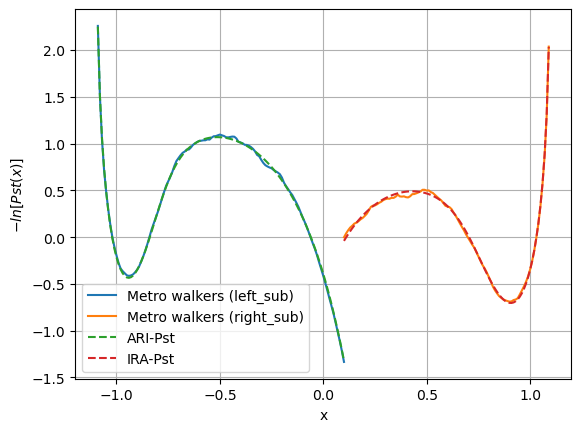

In [8]:
plt.plot(x1_arr, -np.log(Pst_n1), label='Metro walkers (left_sub)')
plt.plot(x2_arr, -np.log(Pst_n2), label='Metro walkers (right_sub)')
plt.plot(x1_arr, -np.log(ari1_trans.steady_state),'--', label="ARI-Pst")
plt.plot(x2_arr, -np.log(ira2_trans.steady_state), '--', label="IRA-Pst")
plt.xlabel('x')
plt.ylabel("$-ln[Pst(x)]$")
plt.grid()
plt.legend()

[0.05689839 0.04536894 0.04366817 0.06121711 0.07372153 0.07164286
 0.07824991 0.07250832 0.05872897 0.06960504 0.07916682 0.07678667
 0.06114127 0.0762288  0.08254287 0.08976992 0.07504645 0.08068706
 0.08103426 0.08069058 0.07923356 0.081509   0.0808679  0.08216961
 0.08277174 0.08179662 0.08310727 0.08274277 0.08035574 0.08008443
 0.08210953 0.08279571 0.08163047 0.07716031 0.0779842  0.07743448
 0.07865514 0.08056249 0.07704323 0.07827001 0.07942691 0.07960982
 0.08144934 0.07893864 0.07541376 0.07345637 0.07536408 0.07433316
 0.07536378 0.07480524 0.07663618 0.0758698  0.07288408 0.07312448
 0.07307668 0.07617932 0.07777426 0.07956685 0.08309126 0.08462332
 0.08184344 0.08080704 0.07305762 0.07656989 0.08102796 0.0828387
 0.08604277 0.0808957  0.07760178 0.075333   0.0729683  0.06380047
 0.06153574 0.05957601 0.05874127 0.05851447 0.05630391 0.0572404
 0.05600407 0.04200813 0.04051435 0.03778487 0.03243026 0.03669839
 0.03214139 0.04476788 0.04656299 0.04058089 0.03708501 0.040911

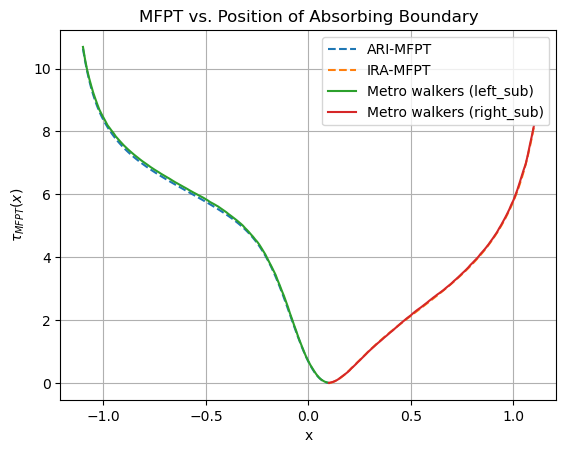

In [9]:
def mfpt_matrix(transMat_instance):
    ria_trans = transMat_instance
    ria_P = ria_trans.trans_mat.T
    idx_fixed_vect = np.where(np.round(ria_trans.eig6_w.real, decimals=10) == 1)[0][0]
    vec_pi = ria_trans.eig6_v[:,idx_fixed_vect].real/np.sum(ria_trans.eig6_v[:,idx_fixed_vect].real)
    N = vec_pi.size
    epsilon = np.ones(N)
    mat_I = np.eye(N)
    mat_E = np.ones((N, N))
    mat_Z = np.linalg.inv(mat_I-ria_P+np.outer(epsilon, vec_pi))
    vec_Zdg = np.diag(mat_Z)
    mat_Zdg = np.diag(vec_Zdg)
    mat_Mdg = np.diag(1/vec_pi)
    mat_M = (mat_I - mat_Z + mat_E @ mat_Zdg) @ mat_Mdg
    mat_Mbar = mat_M - mat_Mdg
    return mat_Mbar

m1_bar = mfpt_matrix(ari1_trans)
m2_bar = mfpt_matrix(ira2_trans)
delt_t = h**2/(2*D0)
plt.plot(x1_arr, delt_t*m1_bar[-1], '--', label="ARI-MFPT")
plt.plot(x2_arr, delt_t*m2_bar[0], '--', label="IRA-MFPT")

# Convert ti_left to float type
ti_left = ti_left.astype(float)
# Replace 0 elements with NaN
ti_left[ti_left == 0] = np.nan
ti_left[:, -1] = 0

# Convert ti_left to float type
ti_right = ti_right.astype(float)
# Replace 0 elements with NaN
ti_right[ti_right == 0] = np.nan
ti_right[:, 0] = 0

mfpt1_simu_arr = ht*np.nanmean(ti_left, axis=0)
mfpt2_simu_arr = ht*np.nanmean(ti_right, axis=0)

plt.plot(n1_arr, mfpt1_simu_arr, label="Metro walkers (left_sub)")
plt.plot(n2_arr, mfpt2_simu_arr, label="Metro walkers (right_sub)")

plt.xlabel('x')
plt.ylabel(r"$\tau_{MFPT} (x)$")
plt.title('MFPT vs. Position of Absorbing Boundary')
plt.legend()
plt.grid()
# plt.savefig("graphs/high_barrier_MFPT.pdf", format='pdf')

print(mfpt1_simu_arr-delt_t*m1_bar[-1])


### Define Functions for Reconstructing Free Energy with MFPT and steady state distribution

In [10]:
def reconstruct_energy_ra(x_arr, Pst_arr, mfpt_arr):
    # Pst_arr[-1] = 0
    interp_Pst_func = CubicSpline(x_arr, np.array(Pst_arr, dtype=float))
    N = x_arr.size
    # Except for the absorbing boundary Pst(b) = 0, D(x)=0, also avoid at reflecting boundary A(x)=0, B(x)=0
    Bx_arr = np.zeros(N-2)
    integral_Pst_arr = np.zeros(N-2)
    for i in range(N-2):
        integral_Pst_arr[i], _ = quad(interp_Pst_func, x_arr[1+i], x_arr[-1])
        Bx_arr[i] = -1.0/interp_Pst_func(x_arr[1+i])*(integral_Pst_arr[i]-(mfpt_arr[-1]-mfpt_arr[1+i])/mfpt_arr[-1])

    interp_invertBx_func = CubicSpline(x_arr[1:-1], 1.0/Bx_arr)
    integral_invertBx_arr = np.zeros(N-2)
    beta_Grec2_arr = np.zeros(N-2)
    for i in range(N-2):
        # Here x0 is x_arr[1]
        integral_invertBx_arr[i], _ = quad(interp_invertBx_func, x_arr[1], x_arr[1+i])
        beta_Grec2_arr[i] = beta_U(x_arr[1])+np.log(Bx_arr[i]/Bx_arr[0])-integral_invertBx_arr[i]
    return beta_Grec2_arr

def reconstruct_energy_ar(x_arr, Pst_arr, mfpt_arr):
    # Pst_arr[0] = 0
    interp_Pst_func = CubicSpline(x_arr, np.array(Pst_arr, dtype=float))
    N = x_arr.size
    # Except for the absorbing boundary Pst(b) = 0, D(x)=0, also avoid at reflecting boundary A(x)=0, B(x)=0
    Bx_arr = np.zeros(N-2)
    integral_Pst_arr = np.zeros(N-2)
    for i in range(N-2):
        integral_Pst_arr[i], _ = quad(interp_Pst_func, x_arr[0], x_arr[1+i])
        Bx_arr[i] = -1.0/interp_Pst_func(x_arr[1+i])*(integral_Pst_arr[i]+(mfpt_arr[1+i]-mfpt_arr[0])/mfpt_arr[0])

    interp_invertBx_func = CubicSpline(x_arr[1:-1], 1.0/Bx_arr)
    integral_invertBx_arr = np.zeros(N-2)
    beta_Grec2_arr = np.zeros(N-2)
    for i in range(N-2):
        # Here x0 is x_arr[1]
        integral_invertBx_arr[i], _ = quad(interp_invertBx_func, x_arr[1+i], x_arr[-2])
        beta_Grec2_arr[i] = beta_U(x_arr[-2])+np.log(Bx_arr[i]/Bx_arr[-1])-integral_invertBx_arr[i]
    return beta_Grec2_arr

### Reconstruction Using data [mfpt (mfpt1_simu_arr), Pst (Pst_n)] extracted from simulation

/tmp/ipykernel_814323/2877723197.py:29: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_Pst_arr[i], _ = quad(interp_Pst_func, x_arr[0], x_arr[1+i])
/tmp/ipykernel_814323/2877723197.py:37: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the 

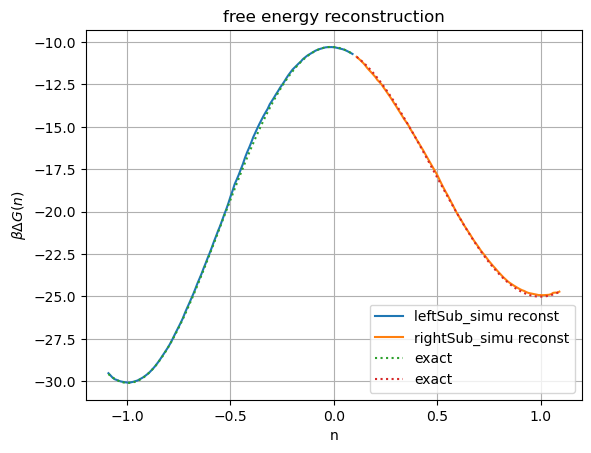

In [11]:
# np.append(delt_t*m1_bar[-1][0], mfpt1_simu_arr[1:])
beta_Grec2_arr1 = reconstruct_energy_ar(n1_arr, Pst_arr=Pst_n1, mfpt_arr=mfpt1_simu_arr)
beta_Grec2_arr2 = reconstruct_energy_ra(n2_arr, Pst_arr=Pst_n2, mfpt_arr=mfpt2_simu_arr)
# beta_Grec2_arr1 = reconstruct_energy_ar(n1_arr, Pst_arr=Pst_n1, mfpt_arr=m1_bar[-1])
# beta_Grec2_arr2 = reconstruct_energy_ra(n2_arr, Pst_arr=Pst_n2, mfpt_arr=m2_bar[0])
# beta_Grec2_arr1 = reconstruct_energy_ar(n1_arr, Pst_arr=ari1_trans.steady_state, mfpt_arr=mfpt1_simu_arr)
# beta_Grec2_arr2 = reconstruct_energy_ra(n2_arr, Pst_arr=ira2_trans.steady_state, mfpt_arr=mfpt2_simu_arr)
# print(Pst_n1[0], Pst_n2[-1], hx*np.sum(Pst_n1), hx*np.sum(Pst_n2))
plt.plot(n1_arr[1:-1], beta_Grec2_arr1, label="leftSub_simu reconst")
plt.plot(n2_arr[1:-1], beta_Grec2_arr2, label="rightSub_simu reconst")
plt.plot(x1_arr[1:-1], beta_U(x1_arr[1:-1]), ':', label="exact")
plt.plot(x2_arr[1:-1], beta_U(x2_arr[1:-1]), ':', label="exact")

# Plot formatting
plt.xlabel('n')
plt.ylabel('$ \\beta \Delta G(n) $')
plt.title('free energy reconstruction')
plt.legend()
plt.grid()
# plt.savefig("graphs/high_barrier_reconstruction.pdf", format='pdf')

1 particle: 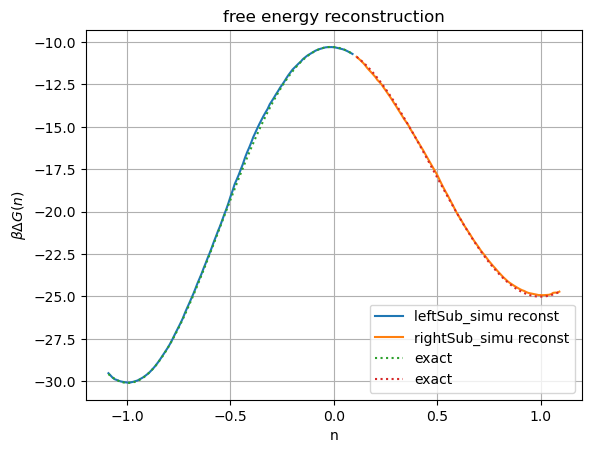

1 particle: 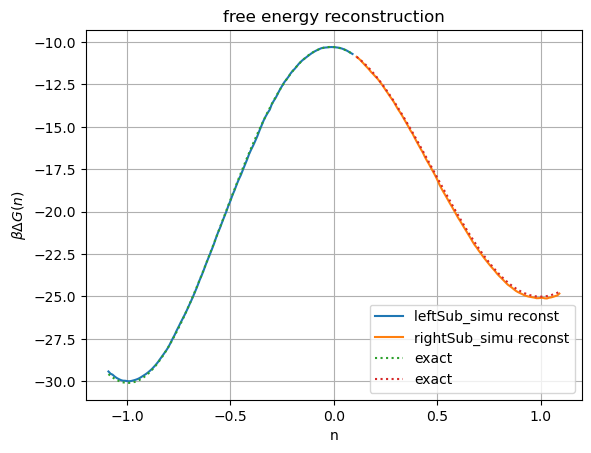

1 particle: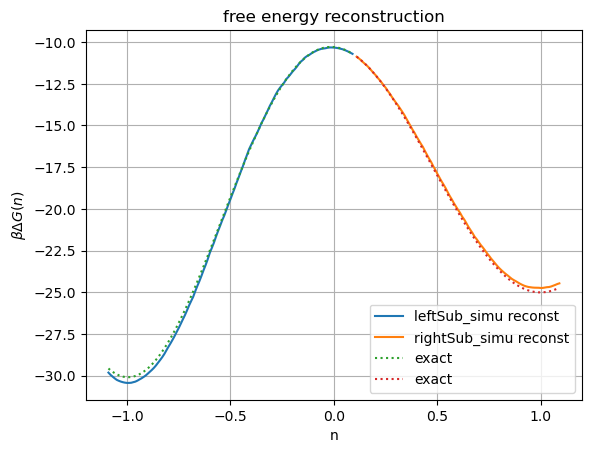

1 particle: 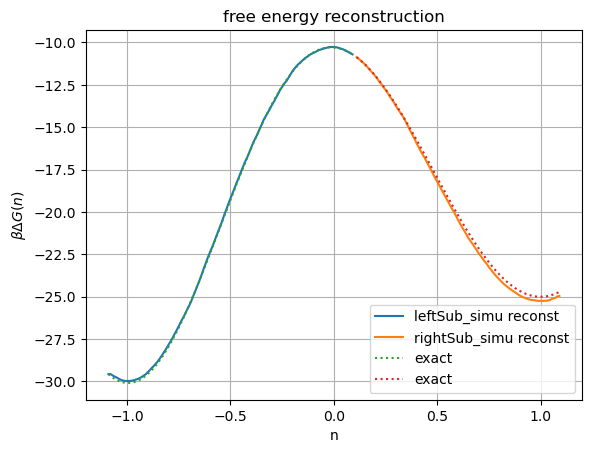

1 particle: 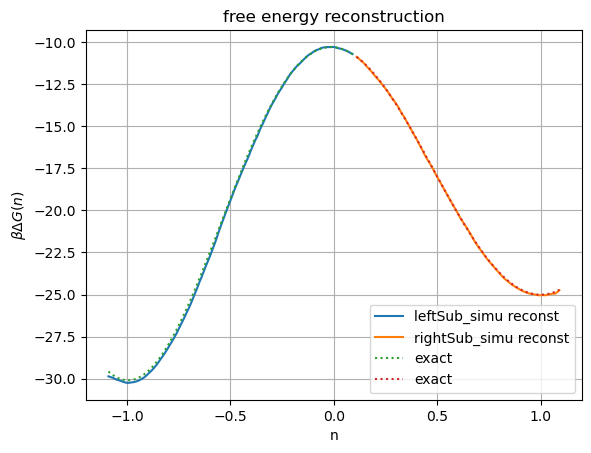

1 particle: 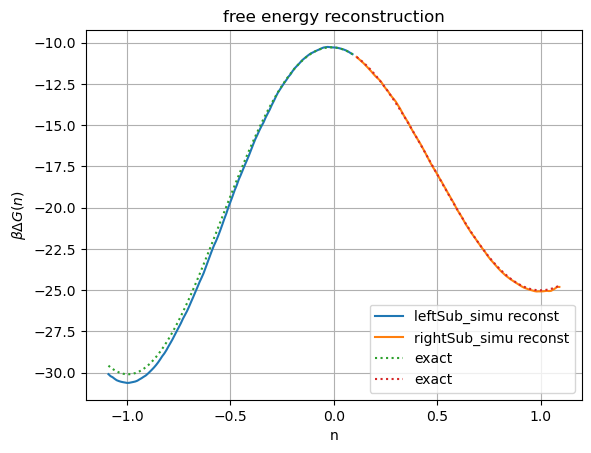

1 particle:
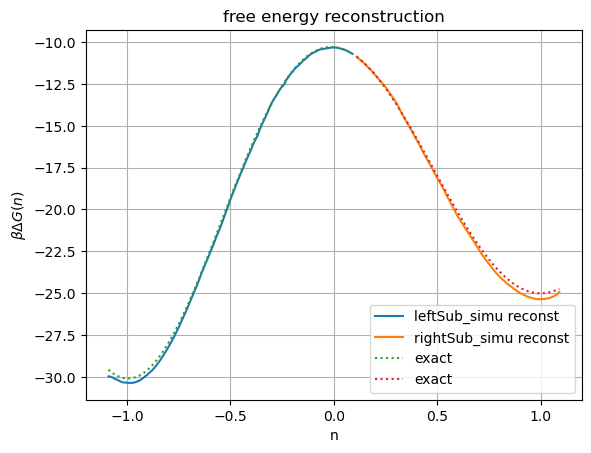

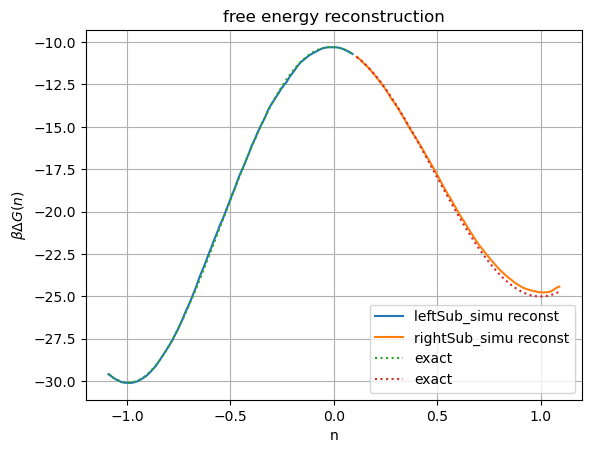

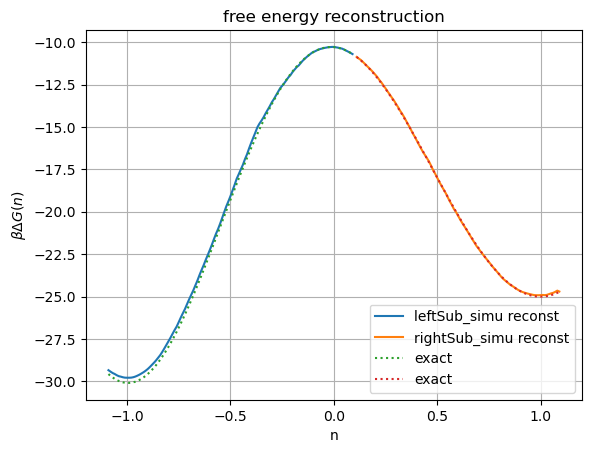

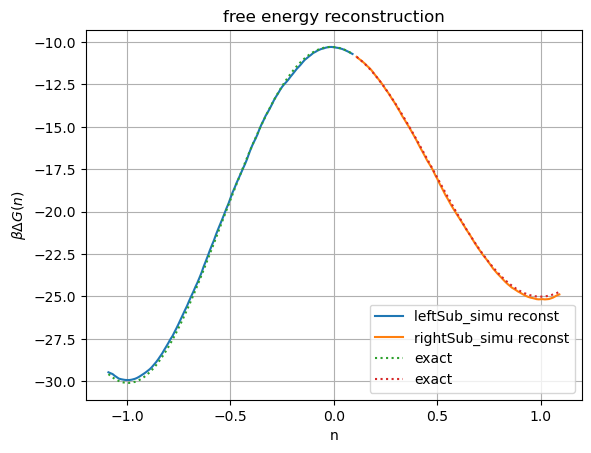

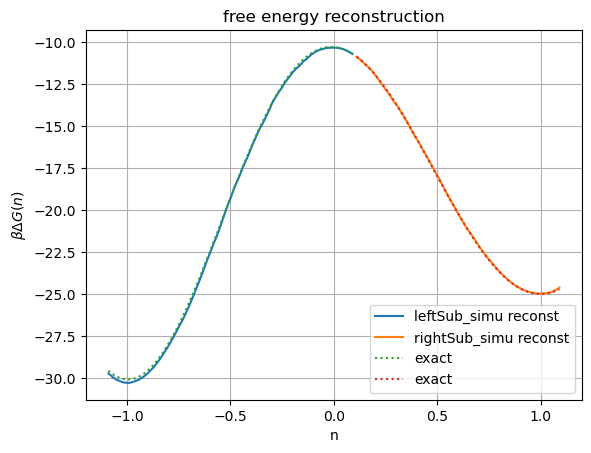

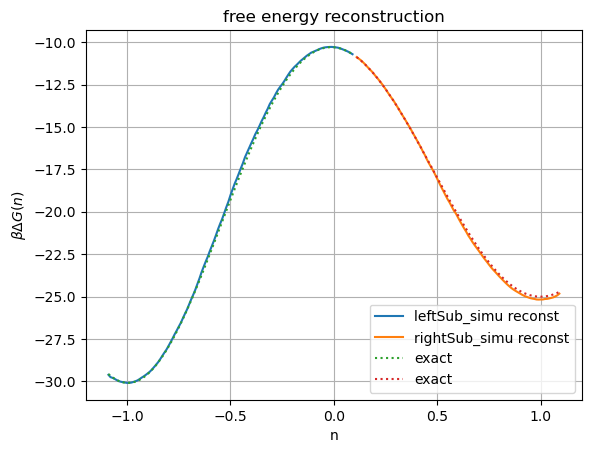

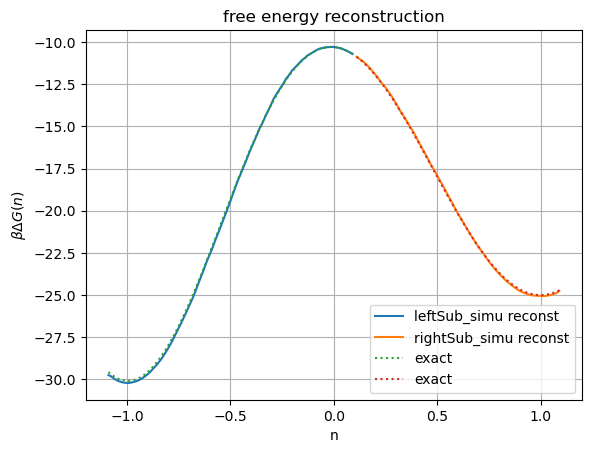

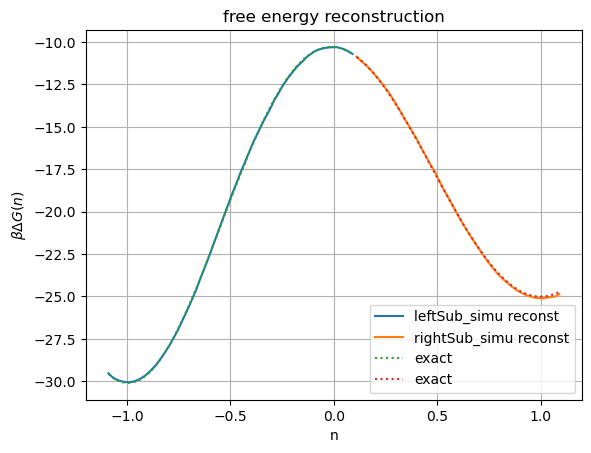

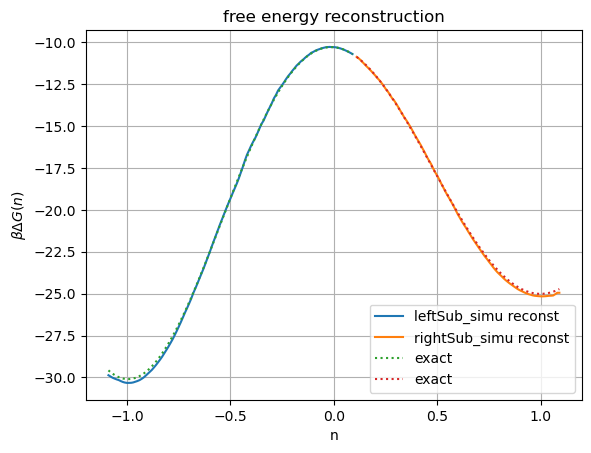

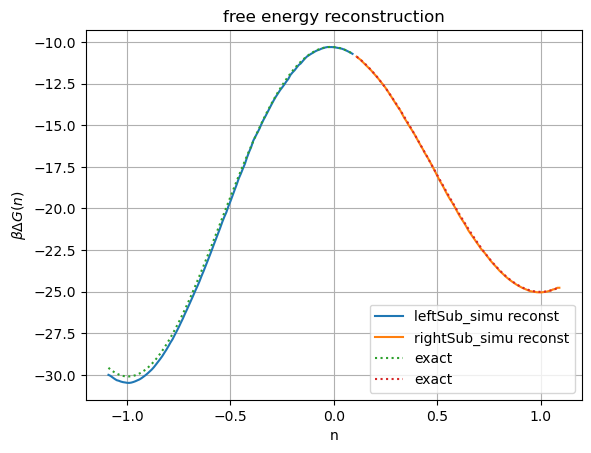

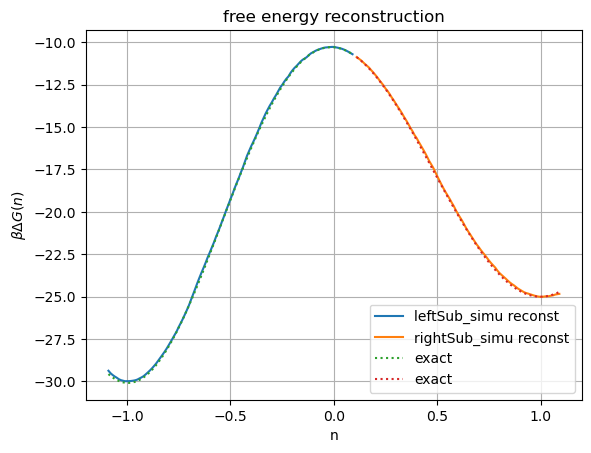

### Reconstruction Using data [mfpt matrix (mat_Mbar[i]), Pst (ria_trans.steady_state)] calculated by Transfer Matrix

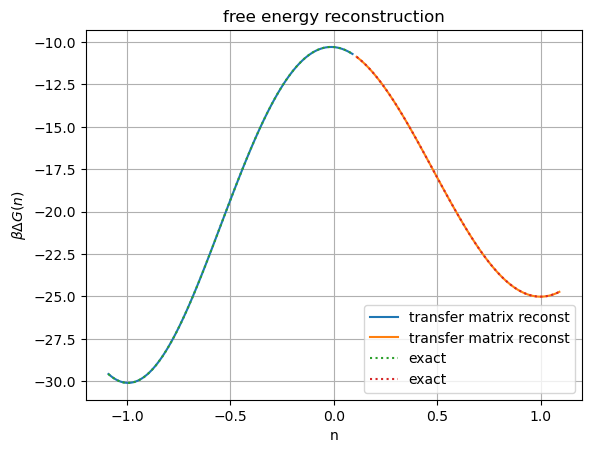

In [12]:
beta_Grec2_arr1 = reconstruct_energy_ar(x1_arr, Pst_arr=ari1_trans.steady_state, mfpt_arr=m1_bar[-1])
beta_Grec2_arr2 = reconstruct_energy_ra(x2_arr, Pst_arr=ira2_trans.steady_state, mfpt_arr=m2_bar[0])

plt.plot(x1_arr[1:-1], beta_Grec2_arr1, label="transfer matrix reconst")
plt.plot(x2_arr[1:-1], beta_Grec2_arr2, label="transfer matrix reconst")

plt.plot(x1_arr[1:-1], beta_U(x1_arr[1:-1]), ':', label="exact")
plt.plot(x2_arr[1:-1], beta_U(x2_arr[1:-1]), ':', label="exact")

# Plot formatting
plt.xlabel('n')
plt.ylabel('$ \\beta \Delta G(n) $')
plt.title('free energy reconstruction')
plt.legend()
plt.grid()